In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from datetime import datetime

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data

In [3]:
df = pd.read_csv("football_playersf_data.csv")

## Viewing the dataframe

In [4]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


## 1. Data Profiling:

In [5]:
df.info

<bound method DataFrame.info of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name      

In [6]:
df.shape

(10754, 22)

In [7]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [8]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Data Quality Checks

### 1.Reliability:

In [249]:
#This dataset was generated by scraping data from Transfermarkt using Selenium and BeautifulSoup

### 2.Timeliness

In [252]:
#Updated 8 months ago

### 3. Consistency

In [255]:
sort_position = df['position'].unique()
sort_position

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [257]:
df[df['position']== 'midfield']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
4341,/jesse-zamudio/profil/spieler/760989,Club León FC,Jesse Zamudio,midfield,175.000000,24.000000,40,0.207373,0.0,0.259217,...,0.0,0.0,1736,0,0,2,400000,400000,3,0
4445,/alejandro-andrade/profil/spieler/801775,Club Necaxa,Alejandro Andrade,midfield,178.000000,21.000000,31,0.219691,0.0,0.475997,...,0.0,0.0,2458,0,0,0,500000,500000,3,0
4745,/luis-calzadilla/profil/spieler/725791,CF Pachuca,Luis Calzadilla,midfield,168.000000,23.000000,34,0.226472,0.0,0.045294,...,0.0,0.0,1987,0,0,0,200000,200000,3,0
6427,/angelo-bacic/profil/spieler/610696,SC Austria Lustenau,Angelo Bacic,midfield,181.240353,19.000000,49,0.277712,0.0,0.085450,...,0.0,0.0,4213,0,0,0,25000,50000,3,0
6517,/florian-tipotsch/profil/spieler/602778,WSG Tirol,Florian Tipotsch,midfield,181.240353,20.000000,24,0.123457,0.0,0.246914,...,0.0,0.0,1458,337,35,0,50000,50000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,/thulani-gumede/profil/spieler/1029127,Richards Bay FC,Thulani Gumede,midfield,181.240353,21.000000,1,0.000000,0.0,0.000000,...,0.0,0.0,15,0,0,0,25000,25000,3,0
10585,/sam-klein/profil/spieler/976123,Brisbane Roar,Sam Klein,midfield,188.000000,19.000000,1,0.000000,0.0,0.000000,...,0.0,0.0,3,0,0,0,25000,25000,3,0
10586,/james-murphy/profil/spieler/1069560,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.0,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,/riley-gill/profil/spieler/1069561,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.0,0.000000,...,0.0,0.0,0,0,0,0,0,0,3,0


In [259]:
df[df['position']== 'Defender']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
5234,/lewie-coyle/profil/spieler/413402,Hull City,Lewie Coyle,Defender,173.000000,27.000000,66,0.020921,0.062762,0.104603,...,0.0,0.0,4302,0,0,1,800000,800000,2,0
7736,/aaron-quiros/profil/spieler/881010,CA Banfield,Aarón Quirós,Defender,174.000000,21.000000,12,0.110294,0.000000,0.110294,...,0.0,0.0,816,0,0,0,100000,100000,2,0
7843,/joaquin-mosqueira/profil/spieler/1118712,Club Atlético Unión,Joaquín Mosqueira,Defender,181.240353,18.000000,8,0.000000,0.000000,0.260116,...,0.0,0.0,346,0,0,0,25000,25000,2,0
8333,/manato-yoshida/profil/spieler/813766,Yokohama F. Marinos,Manato Yoshida,Defender,172.000000,21.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,44,0,0,0,0,0,2,0
8371,/sojiro-shirahama/profil/spieler/915046,Cerezo Osaka,Sojiro Shirahama,Defender,192.000000,18.000000,18,0.060565,0.060565,0.121131,...,0.0,0.0,1486,0,0,0,0,0,2,0
8407,/yuta-ueda/profil/spieler/671107,Kyoto Sanga,Yuta Ueda,Defender,172.000000,18.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,53,0,0,0,50000,50000,2,0
8481,/ryohei-osada/profil/spieler/916600,Nagoya Grampus,Ryohei Osada,Defender,176.000000,17.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,90,0,0,0,0,0,2,0
8553,/kotaro-hayashi/profil/spieler/1035012,Yokohama FC,Kotaro Hayashi,Defender,170.000000,22.000000,14,0.000000,0.000000,0.160571,...,0.0,0.0,1121,0,0,0,0,0,2,0
8623,/koma-osato/profil/spieler/914822,Sagan Tosu,Koma Osato,Defender,180.000000,18.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,1,50000,50000,2,0
8663,/takuma-eguchi/profil/spieler/1025050,Vissel Kobe,Takuma Eguchi,Defender,177.000000,16.000000,6,0.000000,0.000000,0.000000,...,0.0,0.0,460,0,0,0,0,0,2,0


In [261]:
df[df['position']== 'Attack']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
4506,/raul-camacho/profil/spieler/1029160,Mazatlán FC,Raúl Camacho,Attack,186.000000,21.000000,62,0.423973,0.000000,0.141324,...,0.0,0.0,3821,0,0,0,100000,100000,4,0
6779,/shak-mohammed/profil/spieler/1088718,Orlando City SC,Shak Mohammed,Attack,178.000000,19.000000,10,0.419580,0.000000,0.000000,...,0.0,0.0,429,0,0,0,50000,50000,4,0
7311,/kemy-amiche/profil/spieler/827348,Nashville SC,Kemy Amiche,Attack,175.000000,22.000000,11,0.504202,0.252101,0.126050,...,0.0,0.0,714,0,0,0,25000,25000,4,0
8356,/yuhi-murakami/profil/spieler/913463,Yokohama F. Marinos,Yuhi Murakami,Attack,177.000000,22.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,28,0,0,0,50000,50000,4,0
8357,/kento-shirasu/profil/spieler/910310,Yokohama F. Marinos,Kento Shirasu,Attack,166.000000,16.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,0,0,4,0
8430,/sora-hiraga/profil/spieler/915228,Kyoto Sanga,Sora Hiraga,Attack,172.000000,18.000000,3,0.687023,0.687023,0.000000,...,0.0,0.0,131,0,0,0,50000,50000,4,0
8470,/leon-nozawa/profil/spieler/701043,FC Tokyo,Leon Nozawa,Attack,174.000000,19.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,25000,50000,4,0
8506,/koki-toyoda/profil/spieler/790847,Nagoya Grampus,Koki Toyoda,Attack,171.000000,20.000000,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,50000,50000,4,0
8541,/ota-yamamoto/profil/spieler/1024924,Kashiwa Reysol,Ota Yamamoto,Attack,175.000000,18.000000,1,1.000000,1.000000,0.000000,...,0.0,0.0,90,0,0,0,50000,50000,4,0
8609,/ichika-maeda/profil/spieler/1115426,Avispa Fukuoka,Ichika Maeda,Attack,173.000000,16.000000,1,0.000000,0.000000,0.000000,...,0.0,0.0,3,0,0,0,0,0,4,0


### 4. Relevance

In [264]:
#All columns are required except name and player  columns


### 5. Uniqueness

In [267]:
df.duplicated().sum().sum()

0

### 6. Completeness

In [270]:
df.isna().sum().sum()

0

In [272]:
count_dash = (df == '-').sum().sum()

print(count_dash)

0


In [274]:
count_slash = (df == '/').sum().sum()

print(count_slash)

0


### 7. Check Accuracy

#### check columns types 

In [278]:
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [32]:
#All types of columns are suitable.

#### check outliers 

<Axes: xlabel='Current_Value', ylabel='Count'>

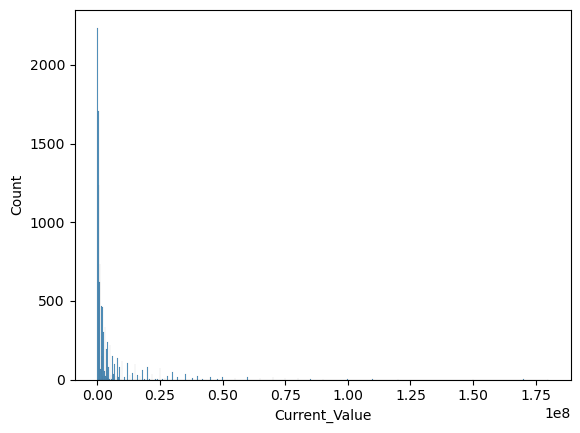

In [163]:
sns.histplot(data=df, x="Current_Value")

<Axes: xlabel='Highest_Value', ylabel='Count'>

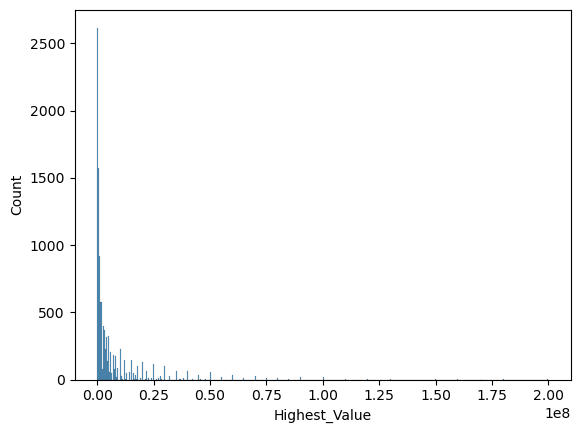

In [167]:
sns.histplot(data=df, x="Highest_Value")

## Data Cleaning

#### Consistency

In [148]:
sort_position

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [ ]:
'''df['position'] = df['position'].str.replace('midfield','midfield-CentralMidfield') 
df['position'] = df['position'].str.replace('Attack','Attack Centre-Forward') 
df['position'] = df['position'].str.replace('Defender','Defender Centre-Back') '''


In [9]:
df['position'] = np.where(df['position'].str.strip() == 'midfield','midfield-CentralMidfield',  df['position'])
df['position'] = np.where(df['position'].str.strip() == 'Attack','Attack Centre-Forward',  df['position'])
df['position'] = np.where(df['position'].str.strip() == 'Defender','Defender Centre-Back',  df['position'])
                          

In [10]:
sort_position_v2 = df['position'].unique()
sort_position_v2

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker'], dtype=object)

#### Relevance

In [11]:
del df['player']
del df['name']

In [12]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [13]:
df.rename(columns={
    'team': 'Team',
    'position': 'Position',
    'height': 'Height',
    'age': 'Age',
    'appearance': 'Appearances',
    'goals': 'Goals',
    'assists': 'Assists',
    'yellow cards': 'Yellow_Cards',
    'second yellow cards': 'Second_Yellow_Cards',
    'red cards': 'Red_Cards',
    'goals conceded': 'Goals_Conceded',
    'clean sheets': 'Clean_Sheets',
    'minutes played': 'Minutes_Played',
    'days_injured': 'Days_Injured',
    'games_injured': 'Games_Injured',
    'award': 'Award',
    'current_value': 'Current_Value',
    'highest_value': 'Highest_Value',
    'position_encoded': 'Position_Encoded',
    'winger': 'Winger'
}, inplace=True)

In [14]:
df.columns

Index(['Team', 'Position', 'Height', 'Age', 'Appearances', 'Goals', 'Assists',
       'Yellow_Cards', 'Second_Yellow_Cards', 'Red_Cards', 'Goals_Conceded',
       'Clean_Sheets', 'Minutes_Played', 'Days_Injured', 'Games_Injured',
       'Award', 'Current_Value', 'Highest_Value', 'Position_Encoded',
       'Winger'],
      dtype='object')

#### outliers

<Axes: xlabel='Current_Value', ylabel='Count'>

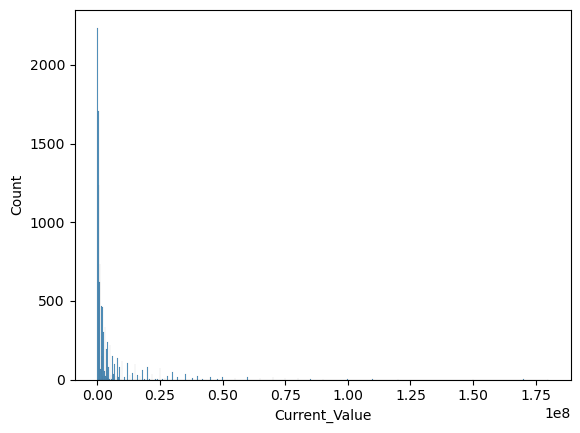

In [293]:
sns.histplot(data=df, x="Current_Value")

In [15]:
df = df[df['Current_Value'] <= 30000000]

<Axes: xlabel='Current_Value', ylabel='Count'>

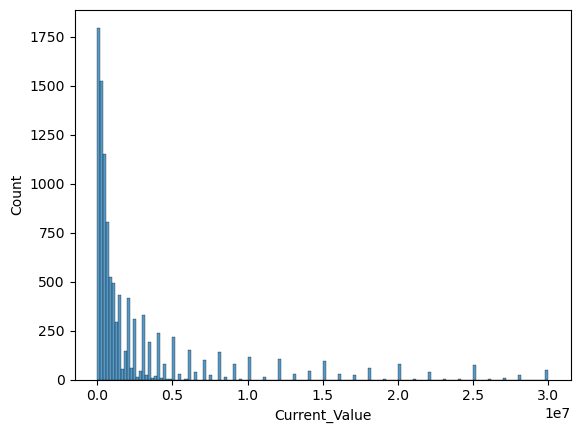

In [297]:
sns.histplot(data=df, x="Current_Value")

<Axes: xlabel='Highest_Value', ylabel='Count'>

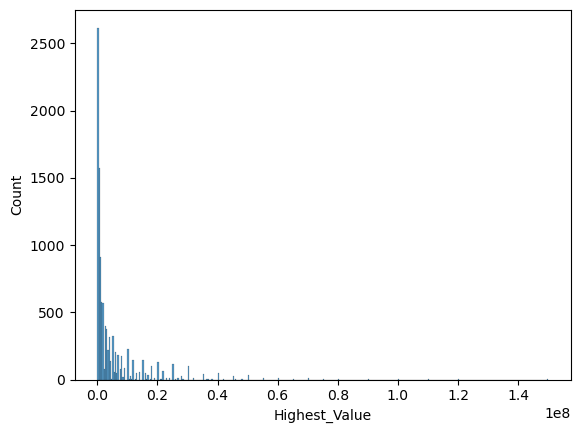

In [298]:
sns.histplot(data=df, x="Highest_Value")

In [16]:
df = df[df['Highest_Value'] <= 30000000]

<Axes: xlabel='Highest_Value', ylabel='Count'>

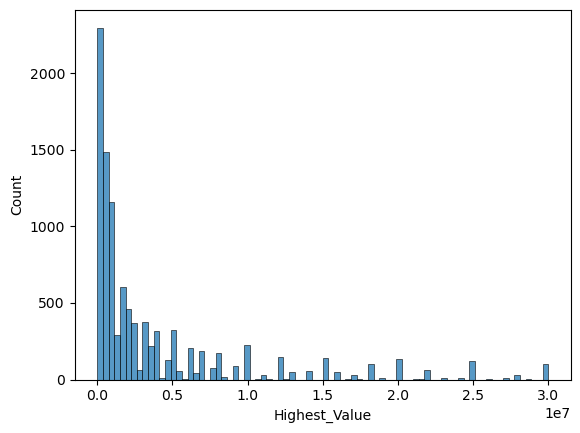

In [301]:
sns.histplot(data=df, x="Highest_Value")

In [208]:
df.dtypes

Team                    object
Name                    object
Position                object
Height                 float64
Age                    float64
Appearances              int64
Goals                  float64
Assists                float64
Yellow_Cards           float64
Second_Yellow_Cards    float64
Red_Cards              float64
Goals_Conceded         float64
Clean_Sheets           float64
Minutes_Played           int64
Days_Injured             int64
Games_Injured            int64
Award                    int64
Current_Value            int64
Highest_Value            int64
Position_Encoded         int64
Winger                   int64
dtype: object

In [17]:
categorical_features = ['Team',  'Position']

In [18]:
for i in categorical_features:
    print(df[i].value_counts())

Team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
Manchester City            6
Atlético de Madrid         6
Real Madrid                6
Gaziantep FK               6
FC Barcelona               4
Name: count, Length: 374, dtype: int64
Position
Defender Centre-Back          1774
Attack Centre-Forward         1338
Goalkeeper                    1208
midfield-CentralMidfield      1155
midfield-DefensiveMidfield     859
Defender Right-Back            846
Defender Left-Back             783
midfield-AttackingMidfield     740
Attack-RightWinger             677
Attack-LeftWinger              670
midfield-RightMidfield         101
midfield-LeftMidfield           96
Attack-SecondStriker            56
Name: count, dtype: int64


### Data visualization

#### Q.1 Top five clubs by average value

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30080\2685258611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Current_Value', data=top_five_clubs, palette='viridis')


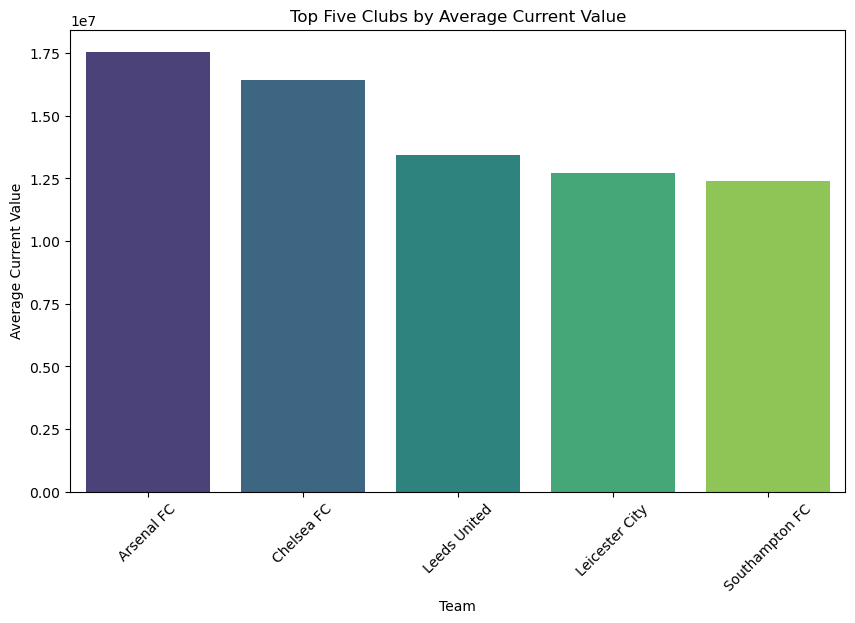

In [309]:
average_values = df.groupby('Team')['Current_Value'].mean().reset_index()
top_five_clubs = average_values.sort_values(by='Current_Value', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Current_Value', data=top_five_clubs, palette='viridis')
plt.title('Top Five Clubs by Average Current Value')
plt.xlabel('Team')
plt.ylabel('Average Current Value')
plt.xticks(rotation=45) 
plt.show()

#### Q.2 The top three Position

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30080\2486664053.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Current_Value', data=top_three_Position, palette='viridis')


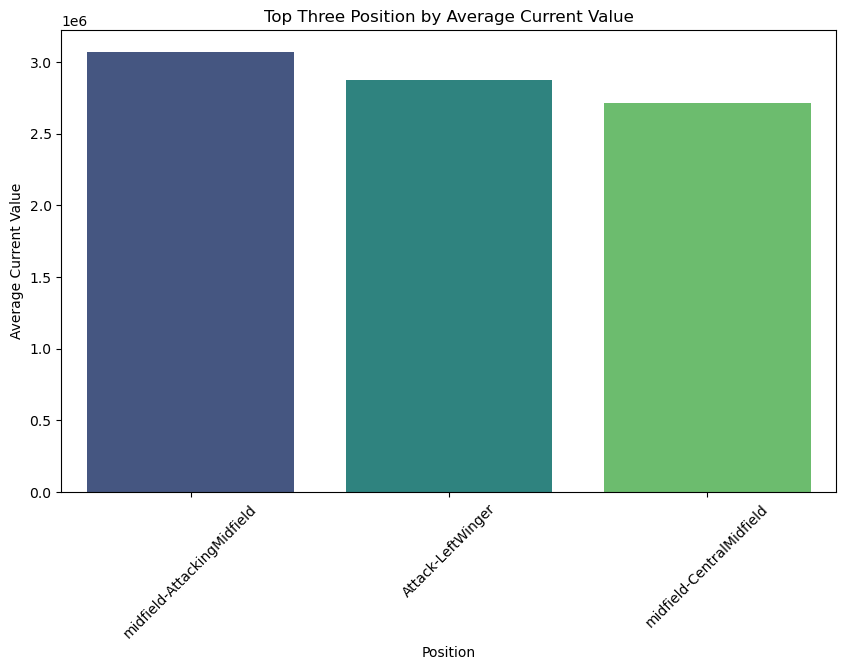

In [312]:
Position_average_values = df.groupby('Position')['Current_Value'].mean().reset_index()
top_three_Position = Position_average_values.sort_values(by='Current_Value', ascending=False).head(3)
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Current_Value', data=top_three_Position, palette='viridis')
plt.title('Top Three Position by Average Current Value')
plt.xlabel('Position')
plt.ylabel('Average Current Value')
plt.xticks(rotation=45) 
plt.show()

#### Q.3 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30080\3495037895.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Minutes_Played', data=top_three_Position, palette='viridis')


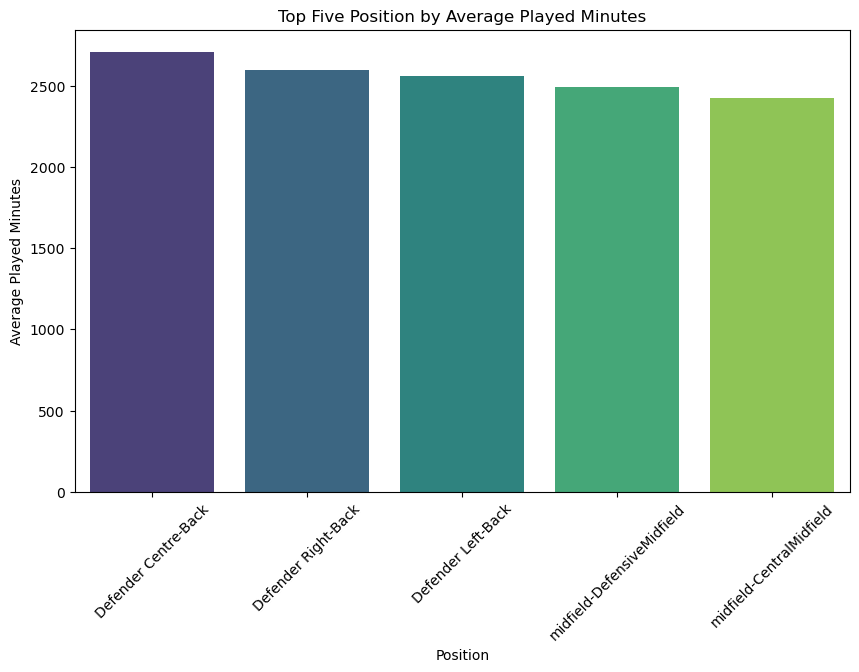

In [315]:
Position_average_values = df.groupby('Position')['Minutes_Played'].mean().reset_index()
top_three_Position = Position_average_values.sort_values(by='Minutes_Played', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Minutes_Played', data=top_three_Position, palette='viridis')
plt.title('Top Five Position by Average Played Minutes')
plt.xlabel('Position')
plt.ylabel('Average Played Minutes')
plt.xticks(rotation=45) 
plt.show()

#### Download Cleaned data

In [19]:
from IPython.display import FileLink
df.to_csv("cleaned_plyear_data.csv", index=False)
FileLink("cleaned_plyear_data.csv")

c:\Users\LENOVO\Downloads\cleaned_plyear_data.csv